Note to grader: Each question is assigned with a score. The final score will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.


In [1]:
# Grader's area
import numpy as np
actualScore = 0
maxScore = 0


# **Assignment 6**
<br>

<font>

In [2]:
from IPython.display import Math
from IPython.display import Latex

import numpy as np
import os
import struct

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

torch.manual_seed(0)

----------------
----------------
----------------

## <font color='blue'> **Question 1.** Visualizing convergence. </font>

Modify this code so that in every epoch it records:

**a.** The training loss, accuracy [10 pt] <br>
**b.** The test loss, accuracy [10 pt]

Then:

**c.** Run the model for 20 epochs and give two plots (one for losses, one for accuracies) for the convergence behavior over 20 epochs. [10 pt]

<br>

**Note:**
Make sure you avoid updating the weights when you use the test set. For that you should consult the notebook from CNNs lecture.




In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 95665178.27it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the model
net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # get loss and accuracy on test data
    # for i, data in enumerate(testloader, 0):

print('Finished Training')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,  2000] loss: 2.213
[1,  4000] loss: 1.871
[1,  6000] loss: 1.705
[1,  8000] loss: 1.588
[1, 10000] loss: 1.531
[1, 12000] loss: 1.488
[2,  2000] loss: 1.419
[2,  4000] loss: 1.391
[2,  6000] loss: 1.380
[2,  8000] loss: 1.349
[2, 10000] loss: 1.328
[2, 12000] loss: 1.307
Finished Training


Finished Training


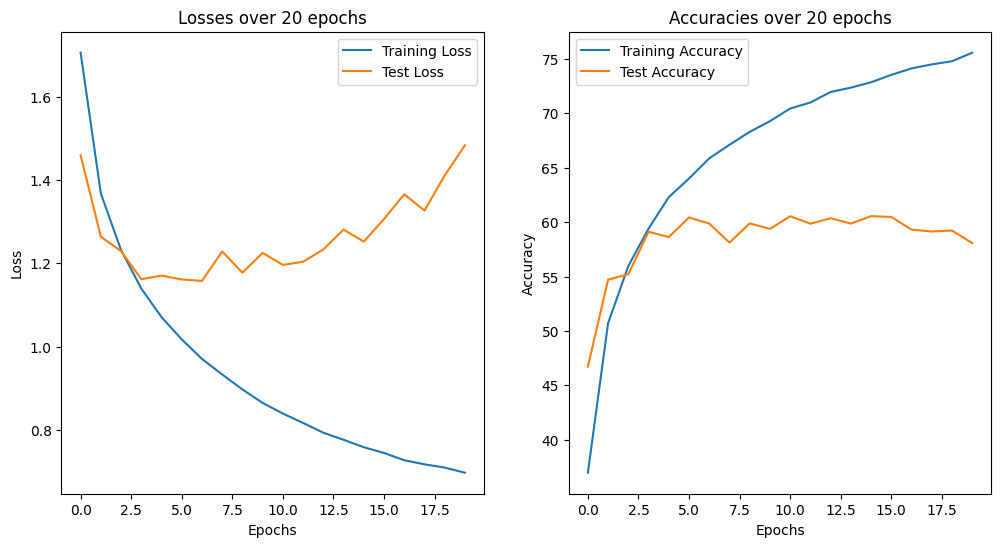

In [16]:
import matplotlib.pyplot as plt

# initialize lists to store losses and accuracies
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(20):  # run for 20 epochs

    running_loss = 0.0
    correct = 0
    total = 0

    net.train()  # set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    running_loss = 0.0
    correct = 0
    total = 0

    net.eval()  # set the model to evaluation mode
    with torch.no_grad():  # turn off gradients for the validation, saves memory and computations
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(running_loss / len(testloader))
    test_accuracies.append(100 * correct / total)

print('Finished Training')

# plot losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses over 20 epochs')
plt.legend()

# plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracies over 20 epochs')
plt.legend()

plt.show()








In [8]:
# For grader use only


maxScore = maxScore + 30


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 2.** Learning random labels. </font>

Reuse the above code, but instead of using the given input labels on the training set, use random labels. Then run for 40 epochs.
<br>

**a.** Report the plots for the training accuracy. **[10 pt]** <br>
**b.** What is the final training accuracy and final testing accuracy? **[10 pt]** <br>
**c.** What would be the expected accuracy for a random baseline model? **[10 pt]**





Finished Training


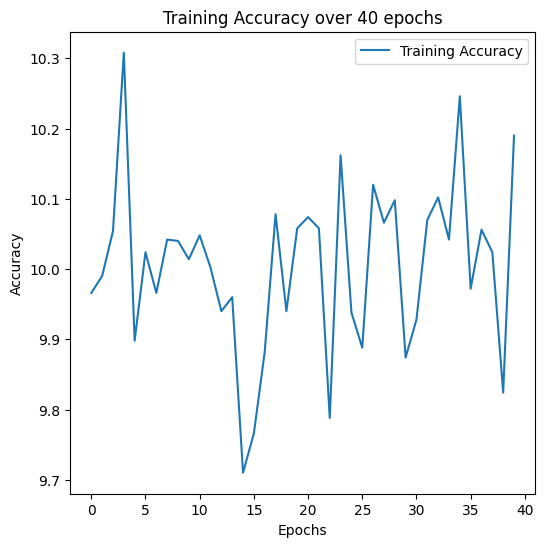

Final training accuracy: 10.19%
Final testing accuracy: 10.00%


In [17]:
## your code goes here

# initialize the model
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



import numpy as np
import matplotlib.pyplot as plt

# initialize lists to store losses and accuracies
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(40):  # run for 40 epochs

    running_loss = 0.0
    correct = 0
    total = 0

    net.train()  # set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data  # ignore the original labels
        labels = torch.from_numpy(np.random.randint(0, 10, size=(batch_size,)))  # generate random labels
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    running_loss = 0.0
    correct = 0
    total = 0

    net.eval()  # set the model to evaluation mode
    with torch.no_grad():  # turn off gradients for the validation, saves memory and computations
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(running_loss / len(testloader))
    test_accuracies.append(100 * correct / total)

print('Finished Training')

# plot accuracies
plt.figure(figsize=(6, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over 40 epochs')
plt.legend()

plt.show()

print(f'Final training accuracy: {train_accuracies[-1]:.2f}%')
print(f'Final testing accuracy: {test_accuracies[-1]:.2f}%')









The expected accuracy for a random baseline model would be the reciprocal of the number of classes, assuming the classes are balanced. In this case, since there are 10 classes (plane, car, bird, cat, deer, dog, frog, horse, ship, truck), a model that makes predictions randomly would be correct about 10% of the time, or an accuracy of 0.1 or 10%. This is because for any given instance, there is a 1 in 10 chance that the model will randomly select the correct class. This is a theoretical expectation and actual results may vary due to randomness. Please note that if the classes are not balanced, the expected accuracy would be different.

In [10]:
# For grader use only


maxScore = maxScore + 30


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 3.** Modifying the model for MNIST. </font>

Let's now work with the MNIST dataset.
<br>

**a.** Download and prepare the dataloaders for the standard MNIST dataset. **[10 pt]** <br>
**b.** Modify the model so that it works with the MNIST dataset. The inner array sizes should be roughly similar, but you can adjust them in the way you choose **[20 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs **[10 pt]**





100%|██████████| 9912422/9912422 [00:00<00:00, 197986176.89it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 68671028.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 205304619.03it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12219710.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Finished Training


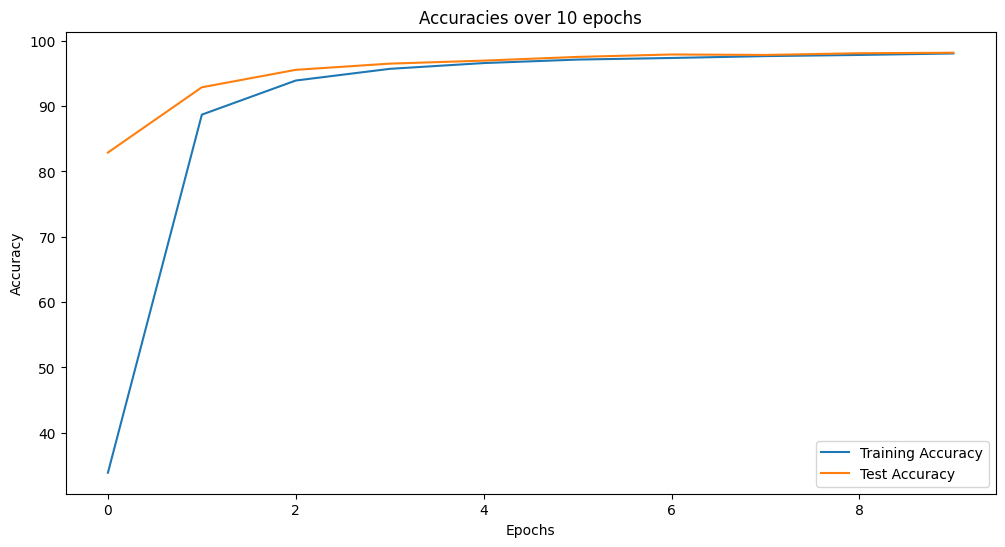

Final training accuracy: 98.06%
Final testing accuracy: 98.18%


In [18]:
## your code goes here
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# a. Download and prepare the dataloaders for the standard MNIST dataset.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# b. Modify the model so that it works with the MNIST dataset.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # MNIST has only 1 channel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # size is reduced to 4*4
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# c. Report the training and test accuracy after 10 epochs
train_accuracies = []
test_accuracies = []

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracies.append(100 * correct_train / total_train)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracies.append(100 * correct_test / total_test)

print('Finished Training')

# plot accuracies
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracies over 10 epochs')
plt.legend()
plt.show()

print(f'Final training accuracy: {train_accuracies[-1]:.2f}%')
print(f'Final testing accuracy: {test_accuracies[-1]:.2f}%')















In [12]:
# For grader use only



maxScore = maxScore + 40


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 4.** MNIST on randomly permuted images. [**optional**]</font>

In this question we will see whether a CNN remains as effective for randomly permuted images.
<br>

**a.** Find a way to randomly permute the entries of a 2d array in numpy or a 2d tensor in PyTorch. This should be 2-3 lines of code - feel free to discuss it on Canvas. **[10 pt]** <br>
**b.** Train the model from question 3 on a training set where the images in the training set have re-arranged in a **random** way, which however is the **same** across all images. **[20 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs, and after 20 epochs. **[10 pt]**





In [19]:
## your code goes here

import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# a. Download and prepare the dataloaders for the standard MNIST dataset.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# b. Modify the model so that it works with the MNIST dataset.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # MNIST has only 1 channel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # size is reduced to 4*4
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# generate a fixed permutation
perm = np.random.permutation(28*28)

# apply the permutation to each image in the dataset
trainset.data = trainset.data.view(-1, 28*28)[:, perm].view(-1, 28, 28)
testset.data = testset.data.view(-1, 28*28)[:, perm].view(-1, 28, 28)

# c. Report the training and test accuracy after 10 epochs and after 20 epochs
train_accuracies = []
test_accuracies = []

for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracies.append(100 * correct_train / total_train)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracies.append(100 * correct_test / total_test)

    # report accuracy after 10 and 20 epochs
    if epoch == 9 or epoch == 19:
        print(f'Accuracy after {epoch + 1} epochs: {train_accuracies[-1]:.2f}% (train), {test_accuracies[-1]:.2f}% (test)')

print('Finished Training')














Accuracy after 10 epochs: 92.93% (train), 93.16% (test)
Accuracy after 20 epochs: 95.07% (train), 94.08% (test)
Finished Training


In [14]:
# For grader use only


maxScore = maxScore + 40

In [15]:
# for grader use

# Total Grade Calculation

score = actualScore*100/maxScore